1. Installation of extensions

In [1]:
!pip install -q kaggle

In [2]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.2 MB/s eta 0:00:00


In [3]:
!pip install pycountry_convert


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 12.9 MB/s eta 0:00:00


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
! mkdir ~/.kaggle

In [6]:
! cp /content/sample_data/kaggle.json ~/.kaggle/

cp: cannot stat '/content/sample_data/kaggle.json': No such file or directory


In [7]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [8]:
! kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.11/dist-packages/kaggle/__init__.py", line 6, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 434, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


2. Dataset

In [9]:
! kaggle datasets download smayanj/netflix-users-database

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'


In [10]:
! unzip netflix-users-database.zip

unzip:  cannot find or open netflix-users-database.zip, netflix-users-database.zip.zip or netflix-users-database.zip.ZIP.


3. Loading libraries and data

In [12]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

#loading data
df = pd.read_csv('/content/sample_data/netflix_users.csv')


4. Undertanding the data

In [13]:
#Undertanding the data
df.head()

,User_ID,Name,Age,Country,Subscription_Type,Watch_Time_Hours,Favorite_Genre,Last_Login
0,1,James Martinez,18,France,Premium,80.26,Drama,2024-05-12
1,2,John Miller,23,USA,Premium,321.75,Sci-Fi,2025-02-05
2,3,Emma Davis,60,UK,Basic,35.89,Comedy,2025-01-24
3,4,Emma Miller,44,USA,Premium,261.56,Documentary,2024-03-25
4,5,Jane Smith,68,USA,Standard,909.30,Drama,2025-01-14


In [14]:
df.shape


(25000, 8)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   User_ID            25000 non-null  int64  
 1   Name               25000 non-null  object 
 2   Age                25000 non-null  int64  
 3   Country            25000 non-null  object 
 4   Subscription_Type  25000 non-null  object 
 5   Watch_Time_Hours   25000 non-null  float64
 6   Favorite_Genre     25000 non-null  object 
 7   Last_Login         25000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.5+ MB


In [16]:
df.columns.values


array(['User_ID', 'Name', 'Age', 'Country', 'Subscription_Type',
       'Watch_Time_Hours', 'Favorite_Genre', 'Last_Login'], dtype=object)

In [17]:
df.dtypes

,0
User_ID,int64
Name,object
Age,int64
Country,object
Subscription_Type,object
Watch_Time_Hours,float64
Favorite_Genre,object
Last_Login,object


5. Visualize missing values as a matrix

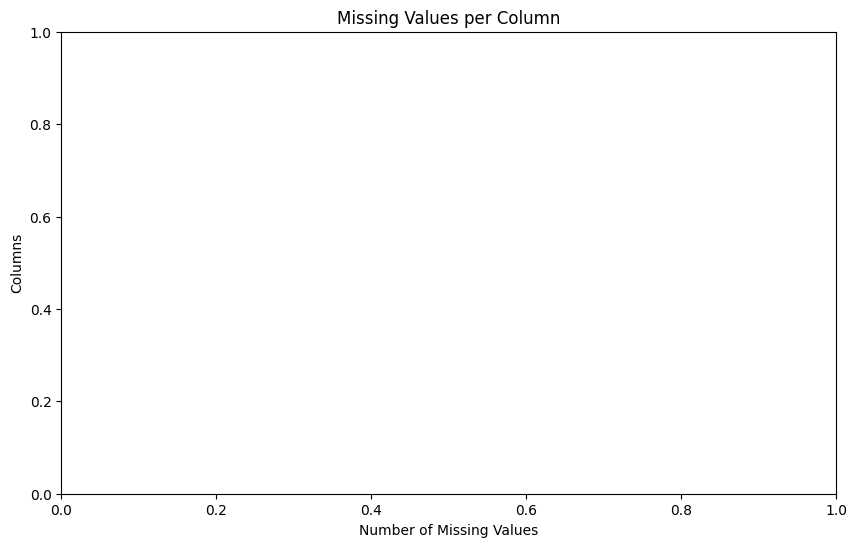

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (assuming it's a CSV file named 'netflix_users.csv')
df = pd.read_csv('/content/sample_data/netflix_users.csv')  # Replace 'netflix_users.csv' with the actual file path if needed

# Count missing values
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_counts.values, y=missing_counts.index, palette='viridis')
plt.title('Missing Values per Column')
plt.xlabel('Number of Missing Values')
plt.ylabel('Columns')
plt.show()

6. Data Manipulation

In [19]:
df['User_ID'] = pd.to_numeric(df.User_ID, errors='coerce')
df.isnull().sum()

,0
User_ID,0
Name,0
Age,0
Country,0
Subscription_Type,0
Watch_Time_Hours,0
Favorite_Genre,0
Last_Login,0


In [20]:
df[np.isnan(df['User_ID'])]

,User_ID,Name,Age,Country,Subscription_Type,Watch_Time_Hours,Favorite_Genre,Last_Login


In [21]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/sample_data/netflix_users.csv')

# Check if 'Age' column exists
if "Age" in df.columns:
    # Filter users below 18
    df_below_18 = df[df["Age"] < 18]

    # Display the count and first few rows
    print(f"Total users below 18: {len(df_below_18)}")
    print(df_below_18.head())
else:
    print("Column 'Age' not found in the dataset.")


Total users below 18: 1813
    User_ID             Name  Age  Country Subscription_Type  \
26       27      James Jones   17   Mexico          Standard   
30       31      Chris Jones   14  Germany           Premium   
39       40  Sarah Hernandez   15   Brazil           Premium   
46       47      Sarah Smith   16   Brazil           Premium   
55       56       Alex Davis   16   Mexico           Premium   

    Watch_Time_Hours Favorite_Genre  Last_Login  
26            253.60    Documentary  2024-09-29  
30             81.89          Drama  2024-08-06  
39            914.70         Horror  2024-04-30  
46            321.21    Documentary  2024-04-13  
55            739.71         Sci-Fi  2024-08-11  


In [22]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/sample_data/netflix_users.csv')

# Check if 'Age' column exists
if "Age" in df.columns:
    df["Above_18"] = df["Age"].apply(lambda x: "Yes" if x >= 18 else "No")

# Display the first few rows
print(df.head())


   User_ID            Name  Age Country Subscription_Type  Watch_Time_Hours  \
0        1  James Martinez   18  France           Premium             80.26   
1        2     John Miller   23     USA           Premium            321.75   
2        3      Emma Davis   60      UK             Basic             35.89   
3        4     Emma Miller   44     USA           Premium            261.56   
4        5      Jane Smith   68     USA          Standard            909.30   

  Favorite_Genre  Last_Login Above_18  
0          Drama  2024-05-12      Yes  
1         Sci-Fi  2025-02-05      Yes  
2         Comedy  2025-01-24      Yes  
3    Documentary  2024-03-25      Yes  
4          Drama  2025-01-14      Yes  


In [23]:
df.isnull().sum()

,0
User_ID,0
Name,0
Age,0
Country,0
Subscription_Type,0
Watch_Time_Hours,0
Favorite_Genre,0
Last_Login,0
Above_18,0


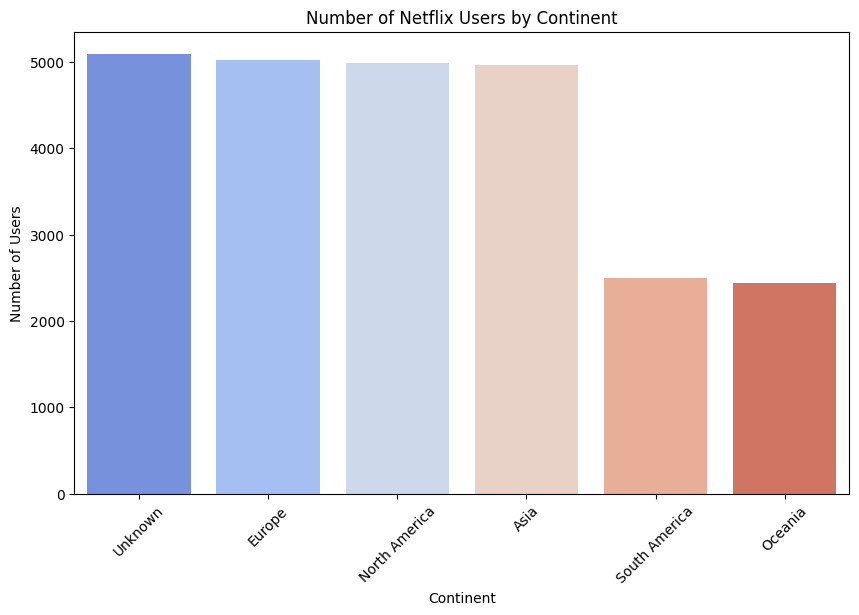

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/sample_data/netflix_users.csv')

# Manual mapping of countries to continents
continent_mapping = {
    "Australia": "Oceania",
    "New Zealand": "Oceania",
    "Fiji": "Oceania",
    "Papua New Guinea": "Oceania",
    "Samoa": "Oceania",
    "Solomon Islands": "Oceania",
    "Vanuatu": "Oceania",

    # Africa
    "South Africa": "Africa",
    "Egypt": "Africa",
    "Nigeria": "Africa",
    "Kenya": "Africa",
    "Morocco": "Africa",

    # Asia
    "India": "Asia",
    "China": "Asia",
    "Japan": "Asia",
    "South Korea": "Asia",
    "Indonesia": "Asia",

    # Europe
    "United Kingdom": "Europe",
    "Germany": "Europe",
    "France": "Europe",
    "Italy": "Europe",
    "Spain": "Europe",

    # North America
    "United States": "North America",
    "Canada": "North America",
    "Mexico": "North America",

    # South America
    "Brazil": "South America",
    "Argentina": "South America",
    "Colombia": "South America",
    "Chile": "South America",

    # Antarctica (Rare case)
    "Antarctica": "Antarctica"
}

# Check if 'Country' column exists
if "Country" in df.columns:
    # Assign continents using the mapping
    df["Continent"] = df["Country"].map(continent_mapping).fillna("Unknown")

    # Count users by continent
    continent_counts = df["Continent"].value_counts()

    # Plot the graph
    plt.figure(figsize=(10, 6))
    sns.barplot(x=continent_counts.index, y=continent_counts.values, palette="coolwarm")
    plt.xlabel("Continent")
    plt.ylabel("Number of Users")
    plt.title("Number of Netflix Users by Continent")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Column 'Country' not found in the dataset.")


7. Data Visualization

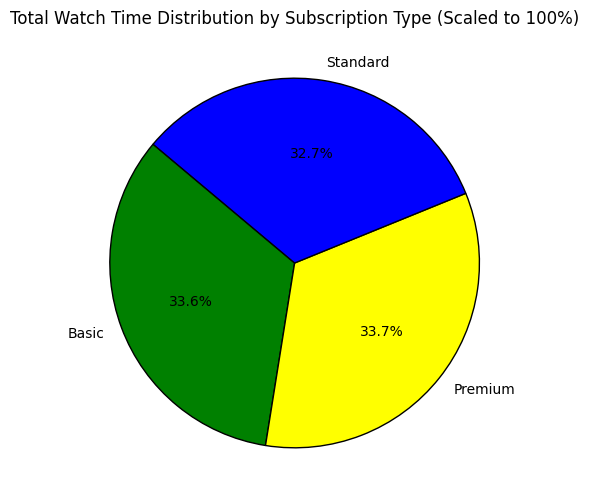

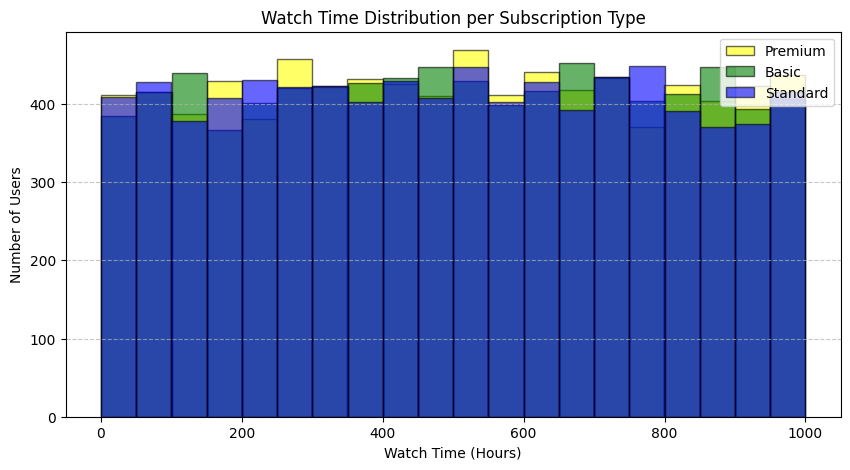

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/sample_data/netflix_users.csv')

# Check if required columns exist
if "Watch_Time_Hours" in df.columns and "Subscription_Type" in df.columns:

    # 🔹 (1) Calculate Watch Time Percentage per Subscription Type
    total_watch_time = df.groupby("Subscription_Type")["Watch_Time_Hours"].sum()
    watch_time_percentage = (total_watch_time / total_watch_time.sum()) * 100

    # Define colors (Green = Basic, Blue = Standard, Yellow = Premium)
    sub_colors = {"Basic": "green", "Standard": "blue", "Premium": "yellow"}

    # 🔹 (2) Pie Chart: Subscription Watch Time Percentage
    plt.figure(figsize=(8, 6))
    plt.pie(watch_time_percentage, labels=watch_time_percentage.index, autopct='%1.1f%%',
            colors=[sub_colors[sub] for sub in watch_time_percentage.index], startangle=140, wedgeprops={'edgecolor': 'black'})
    plt.title("Total Watch Time Distribution by Subscription Type (Scaled to 100%)")
    plt.show()

    # 🔹 (3) Histogram: Watch Time Distribution per Subscription Type
    plt.figure(figsize=(10, 5))

    bins = 20  # Increase bin count for better clarity

    for sub in df["Subscription_Type"].unique():
        subset = df[df["Subscription_Type"] == sub]["Watch_Time_Hours"]
        plt.hist(subset, bins=bins, alpha=0.6, label=sub, color=sub_colors[sub], edgecolor="black")

    plt.xlabel("Watch Time (Hours)")
    plt.ylabel("Number of Users")
    plt.title("Watch Time Distribution per Subscription Type")
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid for better readability
    plt.show()

else:
    print("Columns 'Watch_Time_Hours' or 'Subscription_Type' not found in the dataset.")


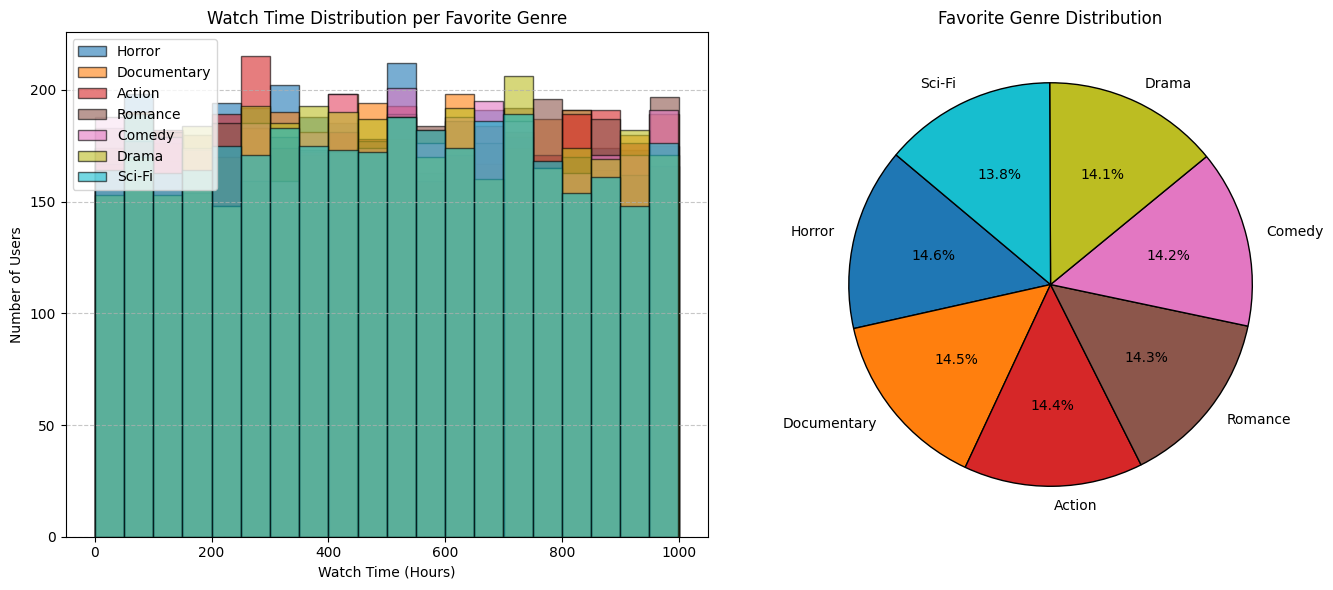

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/sample_data/netflix_users.csv')

# Check if 'Favorite_Genre' and 'Watch_Time_Hours' columns exist
if "Favorite_Genre" in df.columns and "Watch_Time_Hours" in df.columns:

    # Count the number of users per Favorite Genre
    genre_counts = df["Favorite_Genre"].value_counts()

    # Generate unique colors for each genre
    unique_genres = genre_counts.index
    genre_colors = plt.cm.get_cmap("tab10", len(unique_genres))  # Get distinct colors
    color_dict = {genre: genre_colors(i) for i, genre in enumerate(unique_genres)}

    # Create a figure with 2 subplots (Histogram & Pie Chart)
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # 🔹 Histogram: Watch Time Distribution per Favorite Genre
    bins = 20
    for genre in unique_genres:
        subset = df[df["Favorite_Genre"] == genre]["Watch_Time_Hours"]
        axes[0].hist(subset, bins=bins, alpha=0.6, label=genre, color=color_dict[genre], edgecolor="black")

    axes[0].set_xlabel("Watch Time (Hours)")
    axes[0].set_ylabel("Number of Users")
    axes[0].set_title("Watch Time Distribution per Favorite Genre")
    axes[0].legend()
    axes[0].grid(axis='y', linestyle='--', alpha=0.7)

    # 🔹 Pie Chart: Favorite Genre Distribution
    axes[1].pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%',
                colors=[color_dict[genre] for genre in genre_counts.index], startangle=140, wedgeprops={'edgecolor': 'black'})
    axes[1].set_title("Favorite Genre Distribution")

    # Show both charts
    plt.tight_layout()
    plt.show()

else:
    print("Columns 'Favorite_Genre' or 'Watch_Time_Hours' not found in the dataset.")


8. Data Preprocessing

In [27]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('/content/sample_data/netflix_users.csv')

### 1️⃣ Preprocess User_ID
def preprocess_user_id(df):
    df.drop_duplicates(subset=['User_ID'], inplace=True)  # Ensure unique IDs
    df.dropna(subset=['User_ID'], inplace=True)  # Remove missing values
    return df

### 2️⃣ Preprocess Name
def preprocess_name(df):
    df.dropna(subset=['Name'], inplace=True)  # Remove missing names
    df['Name'] = df['Name'].str.title()  # Capitalize first letters
    return df

### 3️⃣ Preprocess Age
def preprocess_age(df):
    df['Age'] = df['Age'].fillna(df['Age'].median())  # Fill missing ages with median
    df = df[(df['Age'] >= 13) & (df['Age'] <= 80)]  # Keep only valid age range
    return df

### 4️⃣ Preprocess Country
def preprocess_country(df):
    df['Country'] = df['Country'].str.strip().str.title()  # Standardize country names
    df['Country'] = df['Country'].fillna('Unknown')  # Replace missing countries
    return df

### 5️⃣ Preprocess Subscription_Type
def preprocess_subscription(df):
    df['Subscription_Type'] = df['Subscription_Type'].fillna('Basic')  # Fill missing values
    df['Subscription_Type'] = df['Subscription_Type'].astype('category')  # Convert to category
    return df

### 6️⃣ Preprocess Watch_Time_Hours
def preprocess_watch_time(df):
    df['Watch_Time_Hours'] = df['Watch_Time_Hours'].fillna(0)  # Fill missing with 0
    df['Watch_Time_Hours'] = np.where(df['Watch_Time_Hours'] > 1000, 1000, df['Watch_Time_Hours'])  # Cap at 1000 hours
    return df

### 7️⃣ Preprocess Favorite_Genre
def preprocess_genre(df):
    df['Favorite_Genre'] = df['Favorite_Genre'].fillna('Unknown')  # Handle missing values
    df['Favorite_Genre'] = df['Favorite_Genre'].astype('category')  # Convert to category
    return df

### 8️⃣ Preprocess Last_Login
def preprocess_last_login(df):
    df['Last_Login'] = pd.to_datetime(df['Last_Login'], errors='coerce')  # Convert to datetime
    df['Last_Login'].fillna(df['Last_Login'].max(), inplace=True)  # Fill missing with most recent login
    return df

### 🔹 Apply Preprocessing Pipeline
def preprocess_data(df):
    df = preprocess_user_id(df)
    df = preprocess_name(df)
    df = preprocess_age(df)
    df = preprocess_country(df)
    df = preprocess_subscription(df)
    df = preprocess_watch_time(df)
    df = preprocess_genre(df)
    df = preprocess_last_login(df)
    return df

# Apply all preprocessing steps
df_cleaned = preprocess_data(df)

# Display the first few rows after cleaning
print(df_cleaned.head())


   User_ID            Name  Age Country Subscription_Type  Watch_Time_Hours  \
0        1  James Martinez   18  France           Premium             80.26   
1        2     John Miller   23     Usa           Premium            321.75   
2        3      Emma Davis   60      Uk             Basic             35.89   
3        4     Emma Miller   44     Usa           Premium            261.56   
4        5      Jane Smith   68     Usa          Standard            909.30   

  Favorite_Genre Last_Login  
0          Drama 2024-05-12  
1         Sci-Fi 2025-02-05  
2         Comedy 2025-01-24  
3    Documentary 2024-03-25  
4          Drama 2025-01-14  


9. Machine Learning Models

Logistic Regression

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load dataset
df = pd.read_csv('/content/sample_data/netflix_users.csv')

# Drop unnecessary columns
df.drop(columns=['User_ID', 'Name'], inplace=True)

# Fill missing values
df.fillna({'Watch_Time_Hours': df['Watch_Time_Hours'].median()}, inplace=True)
df.fillna({'Subscription_Type': 'Basic'}, inplace=True)
df.fillna({'Favorite_Genre': df['Favorite_Genre'].mode()[0]}, inplace=True)

# Encode categorical variables
le = LabelEncoder()
df['Subscription_Type'] = le.fit_transform(df['Subscription_Type'])  # Encode Subscription Type
df['Favorite_Genre'] = le.fit_transform(df['Favorite_Genre'])  # Encode Favorite Genre
df['Country'] = le.fit_transform(df['Country'])  # Encode Country
df['Last_Login'] = pd.to_datetime(df['Last_Login']).astype(int) // 10**9  # Convert date to numerical format

# Select features and target
X = df[['Age', 'Watch_Time_Hours', 'Favorite_Genre', 'Country', 'Last_Login']]
y = df['Subscription_Type']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize Logistic Regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)

# Train the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.3316

Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.29      0.31      1706
           1       0.33      0.41      0.37      1688
           2       0.33      0.29      0.30      1606

    accuracy                           0.33      5000
   macro avg       0.33      0.33      0.33      5000
weighted avg       0.33      0.33      0.33      5000



Logistic Regression Accuracy: 0.3316

Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.29      0.31      1706
           1       0.33      0.41      0.37      1688
           2       0.33      0.29      0.31      1606

    accuracy                           0.33      5000
   macro avg       0.33      0.33      0.33      5000
weighted avg       0.33      0.33      0.33      5000



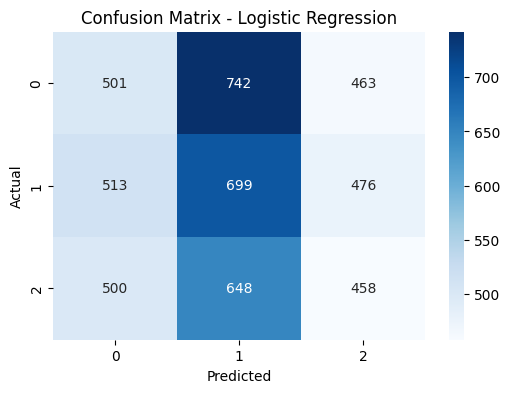

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Train Logistic Regression Model
log_model = LogisticRegression(multi_class='ovr', solver='liblinear')
log_model.fit(X_train, y_train)

# Predictions
y_pred_log = log_model.predict(X_test)

# Evaluate Model
accuracy = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


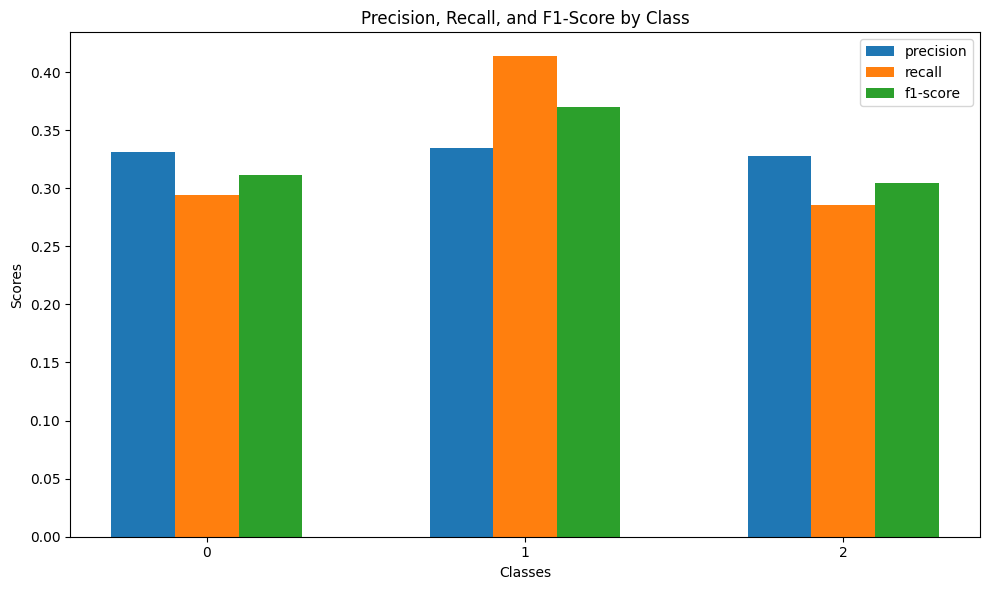

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


# Load dataset
df = pd.read_csv('/content/sample_data/netflix_users.csv')

# Drop unnecessary columns
df.drop(columns=['User_ID', 'Name'], inplace=True)

# Fill missing values
df.fillna({'Watch_Time_Hours': df['Watch_Time_Hours'].median()}, inplace=True)
df.fillna({'Subscription_Type': 'Basic'}, inplace=True)
df.fillna({'Favorite_Genre': df['Favorite_Genre'].mode()[0]}, inplace=True)

# Encode categorical variables
le = LabelEncoder()
df['Subscription_Type'] = le.fit_transform(df['Subscription_Type'])  # Encode Subscription Type
df['Favorite_Genre'] = le.fit_transform(df['Favorite_Genre'])  # Encode Favorite Genre
df['Country'] = le.fit_transform(df['Country'])  # Encode Country
df['Last_Login'] = pd.to_datetime(df['Last_Login']).astype(int) // 10**9  # Convert date to numerical format

# Select features and target
X = df[['Age', 'Watch_Time_Hours', 'Favorite_Genre', 'Country', 'Last_Login']]
y = df['Subscription_Type']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression model
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)

# Train the model
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Extract precision, recall, and F1 scores for each class
metrics = ['precision', 'recall', 'f1-score']
classes = list(report.keys())[:-3]  # Excluding 'accuracy', 'macro avg', 'weighted avg'

# Create subplots to visualize metrics
fig, ax = plt.subplots(figsize=(10, 6))

# Create a bar graph for each metric
bar_width = 0.2
x = np.arange(len(classes))

for i, metric in enumerate(metrics):
    ax.bar(x + i * bar_width, [report[class_name][metric] for class_name in classes], bar_width, label=metric)

# Labeling the chart
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-Score by Class')
ax.set_xticks(x + bar_width)
ax.set_xticklabels(classes)
ax.legend()

plt.tight_layout()
plt.show()

Support Vector Machine (SVM)

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load dataset
df = pd.read_csv('/content/sample_data/netflix_users.csv')

# Drop unnecessary columns
df.drop(columns=['User_ID', 'Name'], inplace=True)

# Fill missing values
df.fillna({'Watch_Time_Hours': df['Watch_Time_Hours'].median()}, inplace=True)
df.fillna({'Subscription_Type': 'Basic'}, inplace=True)
df.fillna({'Favorite_Genre': df['Favorite_Genre'].mode()[0]}, inplace=True)

# Encode categorical variables
le = LabelEncoder()
df['Subscription_Type'] = le.fit_transform(df['Subscription_Type'])  # Encode Subscription Type
df['Favorite_Genre'] = le.fit_transform(df['Favorite_Genre'])  # Encode Favorite Genre
df['Country'] = le.fit_transform(df['Country'])  # Encode Country
df['Last_Login'] = pd.to_datetime(df['Last_Login']).astype(int) // 10**9  # Convert date to numerical format

# Select features and target
X = df[['Age', 'Watch_Time_Hours', 'Favorite_Genre', 'Country', 'Last_Login']]
y = df['Subscription_Type']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [33]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize SVM Model (using Radial Basis Function Kernel)
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')

# Train the model
svm_model.fit(X_train, y_train)

# Predict on test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


SVM Model Accuracy: 0.3306

Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.40      0.37      1706
           1       0.33      0.33      0.33      1688
           2       0.32      0.27      0.29      1606

    accuracy                           0.33      5000
   macro avg       0.33      0.33      0.33      5000
weighted avg       0.33      0.33      0.33      5000



SVM Accuracy: 0.3306

Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.40      0.37      1706
           1       0.33      0.33      0.33      1688
           2       0.32      0.27      0.29      1606

    accuracy                           0.33      5000
   macro avg       0.33      0.33      0.33      5000
weighted avg       0.33      0.33      0.33      5000



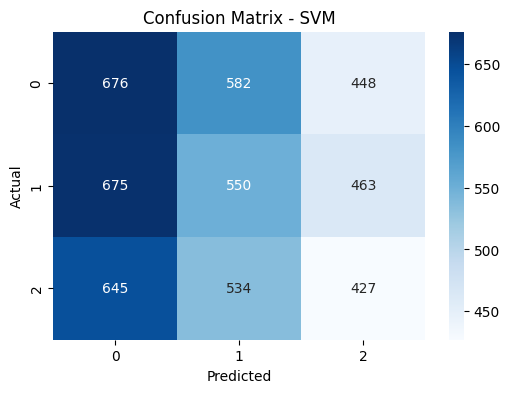

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv('/content/sample_data/netflix_users.csv')

# Drop unnecessary columns
df.drop(columns=['User_ID', 'Name'], inplace=True)

# Fill missing values
df.fillna({'Watch_Time_Hours': df['Watch_Time_Hours'].median()}, inplace=True)
df.fillna({'Subscription_Type': 'Basic'}, inplace=True)
df.fillna({'Favorite_Genre': df['Favorite_Genre'].mode()[0]}, inplace=True)

# Encode categorical variables
le = LabelEncoder()
df['Subscription_Type'] = le.fit_transform(df['Subscription_Type'])  # Encode Subscription Type (Target)
df['Favorite_Genre'] = le.fit_transform(df['Favorite_Genre'])  # Encode Favorite Genre
df['Country'] = le.fit_transform(df['Country'])  # Encode Country
df['Last_Login'] = pd.to_datetime(df['Last_Login']).astype(int) // 10**9  # Convert date to numerical format

# Select features and target variable
X = df[['Age', 'Watch_Time_Hours', 'Favorite_Genre', 'Country', 'Last_Login']]
y = df['Subscription_Type']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train SVM Model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')  # Using RBF kernel
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate Model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

# Confusion Matrix Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()


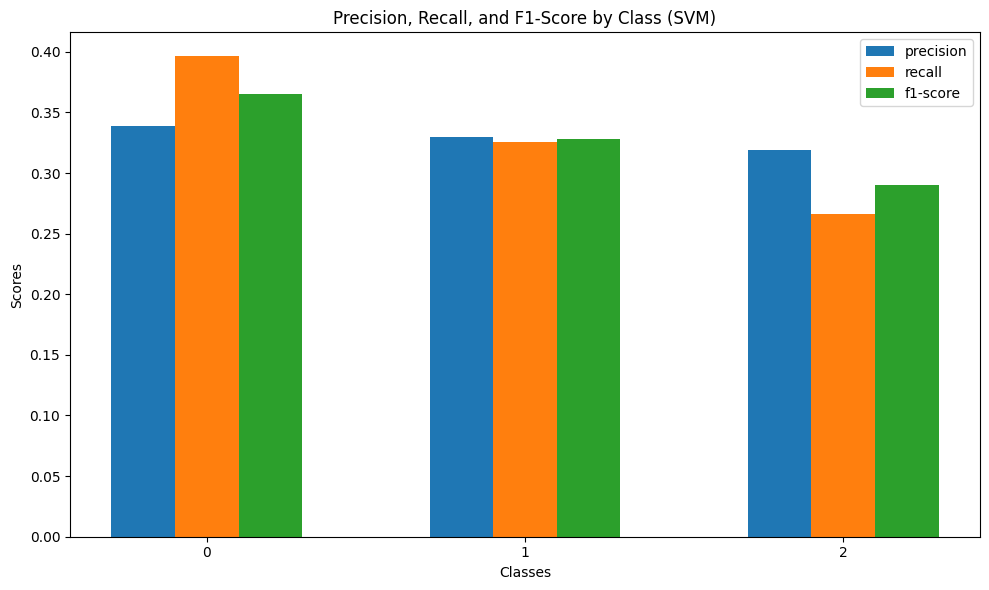

In [35]:
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

# Generate the classification report
report = classification_report(y_test, y_pred_svm, output_dict=True)

# Extract precision, recall, and F1 scores for each class
metrics = ['precision', 'recall', 'f1-score']
classes = list(report.keys())[:-3]  # Excluding 'accuracy', 'macro avg', 'weighted avg'

# Create subplots to visualize metrics
fig, ax = plt.subplots(figsize=(10, 6))

# Create a bar graph for each metric
bar_width = 0.2
x = np.arange(len(classes))

for i, metric in enumerate(metrics):
    ax.bar(x + i * bar_width, [report[class_name][metric] for class_name in classes], bar_width, label=metric)

# Labeling the chart
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-Score by Class (SVM)')
ax.set_xticks(x + bar_width)
ax.set_xticklabels(classes)
ax.legend()

plt.tight_layout()
plt.show()


Decision Trees

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load dataset
df = pd.read_csv('/content/sample_data/netflix_users.csv')

# Drop unnecessary columns
df.drop(columns=['User_ID', 'Name'], inplace=True)

# Fill missing values
df.fillna({'Watch_Time_Hours': df['Watch_Time_Hours'].median()}, inplace=True)
df.fillna({'Subscription_Type': 'Basic'}, inplace=True)
df.fillna({'Favorite_Genre': df['Favorite_Genre'].mode()[0]}, inplace=True)

# Encode categorical variables
le = LabelEncoder()
df['Subscription_Type'] = le.fit_transform(df['Subscription_Type'])  # Encode Subscription Type
df['Favorite_Genre'] = le.fit_transform(df['Favorite_Genre'])  # Encode Favorite Genre
df['Country'] = le.fit_transform(df['Country'])  # Encode Country
df['Last_Login'] = pd.to_datetime(df['Last_Login']).astype(int) // 10**9  # Convert date to numerical format

# Select features and target
X = df[['Age', 'Watch_Time_Hours', 'Favorite_Genre', 'Country', 'Last_Login']]
y = df['Subscription_Type']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Decision Tree Accuracy: 0.3326

Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.23      0.27      1706
           1       0.34      0.38      0.36      1688
           2       0.32      0.39      0.35      1606

    accuracy                           0.33      5000
   macro avg       0.33      0.33      0.33      5000
weighted avg       0.33      0.33      0.33      5000



Decision Tree Accuracy: 0.3316

Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.12      0.18      1706
           1       0.34      0.50      0.40      1688
           2       0.32      0.37      0.34      1606

    accuracy                           0.33      5000
   macro avg       0.33      0.33      0.31      5000
weighted avg       0.33      0.33      0.31      5000



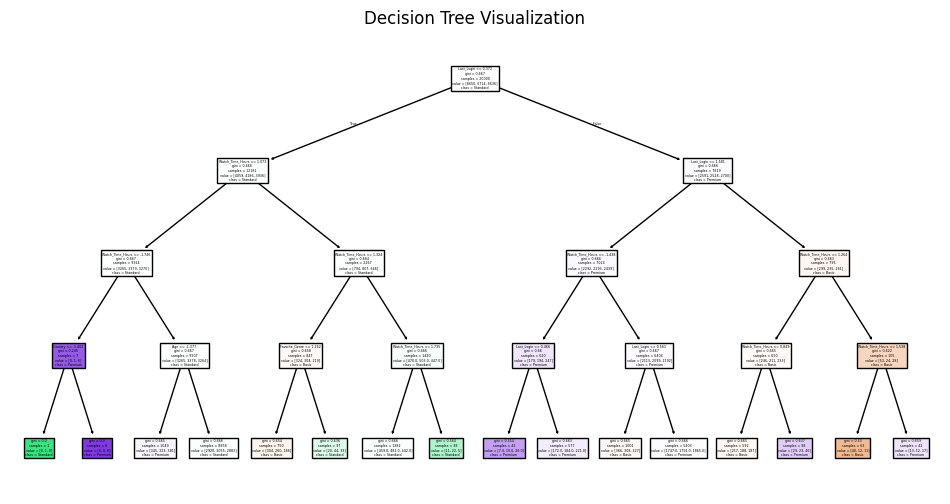

In [38]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Train Decision Tree Model
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate Model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# Plot Decision Tree
plt.figure(figsize=(12, 6))
plot_tree(dt_model, feature_names=['Age', 'Watch_Time_Hours', 'Favorite_Genre', 'Country', 'Last_Login'], class_names=['Basic', 'Standard', 'Premium'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()


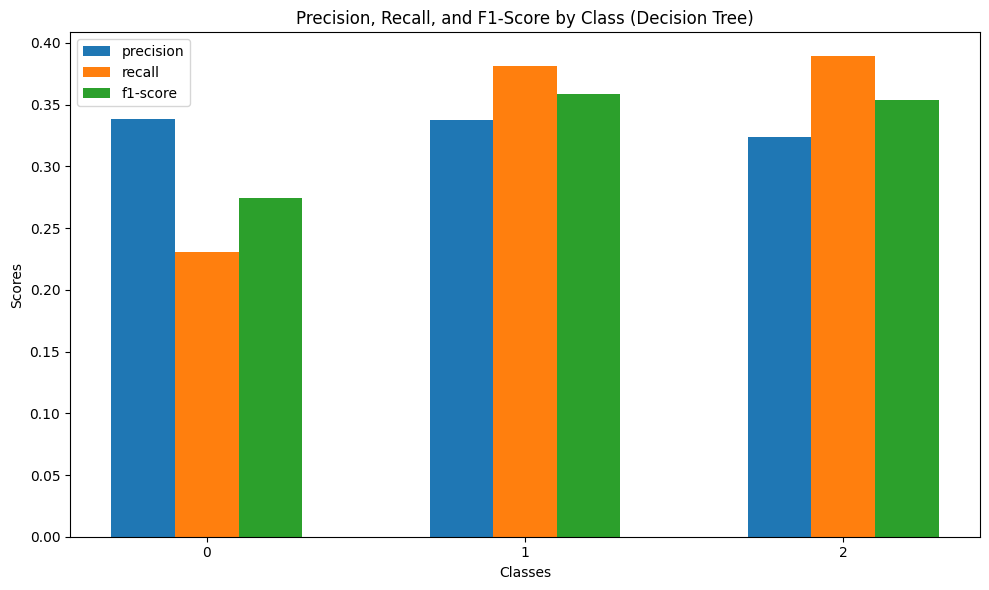

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Extract precision, recall, and F1 scores for each class
metrics = ['precision', 'recall', 'f1-score']
classes = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', 'weighted avg'

# Create subplots to visualize metrics
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width for separation of bars
bar_width = 0.2
x = np.arange(len(classes))

# Plot bars for each metric (precision, recall, f1-score)
for i, metric in enumerate(metrics):
    ax.bar(x + i * bar_width, [report[class_name][metric] for class_name in classes], bar_width, label=metric)

# Add labels and title
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-Score by Class (Decision Tree)')
ax.set_xticks(x + bar_width)
ax.set_xticklabels(classes)
ax.legend()

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the graph
plt.show()


Random Forest

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load dataset
df = pd.read_csv('/content/sample_data/netflix_users.csv')

# Drop unnecessary columns
df.drop(columns=['User_ID', 'Name'], inplace=True)

# Fill missing values
df.fillna({'Watch_Time_Hours': df['Watch_Time_Hours'].median()}, inplace=True)
df.fillna({'Subscription_Type': 'Basic'}, inplace=True)
df.fillna({'Favorite_Genre': df['Favorite_Genre'].mode()[0]}, inplace=True)

# Encode categorical variables
le = LabelEncoder()
df['Subscription_Type'] = le.fit_transform(df['Subscription_Type'])  # Encode Subscription Type
df['Favorite_Genre'] = le.fit_transform(df['Favorite_Genre'])  # Encode Favorite Genre
df['Country'] = le.fit_transform(df['Country'])  # Encode Country
df['Last_Login'] = pd.to_datetime(df['Last_Login']).astype(int) // 10**9  # Convert date to numerical format

# Select features and target
X = df[['Age', 'Watch_Time_Hours', 'Favorite_Genre', 'Country', 'Last_Login']]
y = df['Subscription_Type']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, criterion="gini", max_depth=10, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Random Forest Accuracy: 0.3330

Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.33      0.34      1706
           1       0.33      0.37      0.35      1688
           2       0.31      0.29      0.30      1606

    accuracy                           0.33      5000
   macro avg       0.33      0.33      0.33      5000
weighted avg       0.33      0.33      0.33      5000



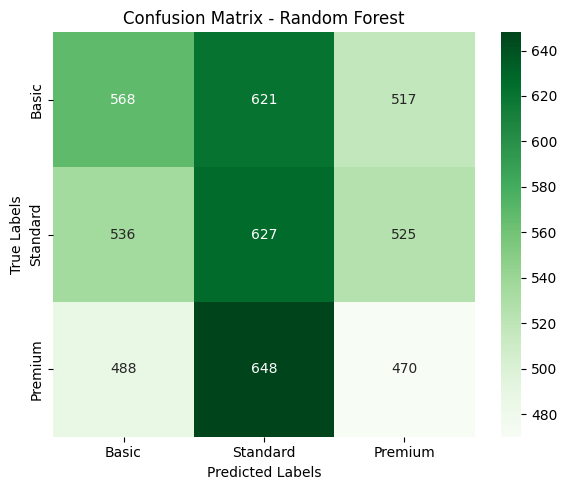

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Greens",
            xticklabels=['Basic', 'Standard', 'Premium'],
            yticklabels=['Basic', 'Standard', 'Premium'])

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Random Forest")
plt.tight_layout()
plt.show()


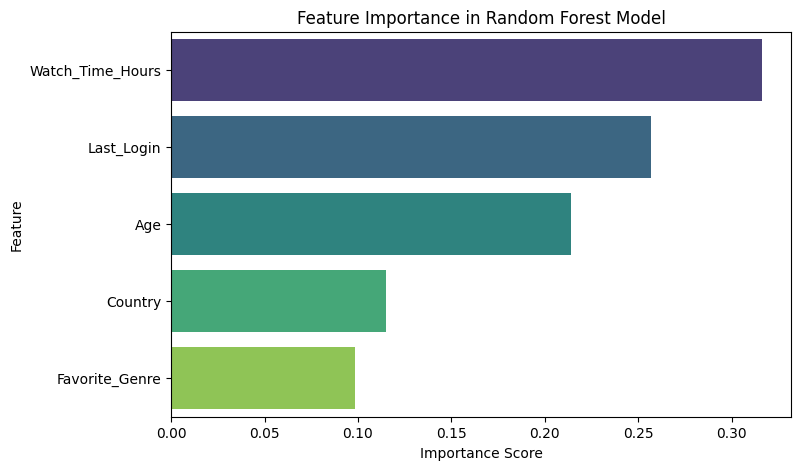

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance scores
feature_importance = rf_model.feature_importances_
feature_names = ['Age', 'Watch_Time_Hours', 'Favorite_Genre', 'Country', 'Last_Login']

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot Feature Importance
plt.figure(figsize=(8, 5))
sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'], palette="viridis")
plt.title("Feature Importance in Random Forest Model")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


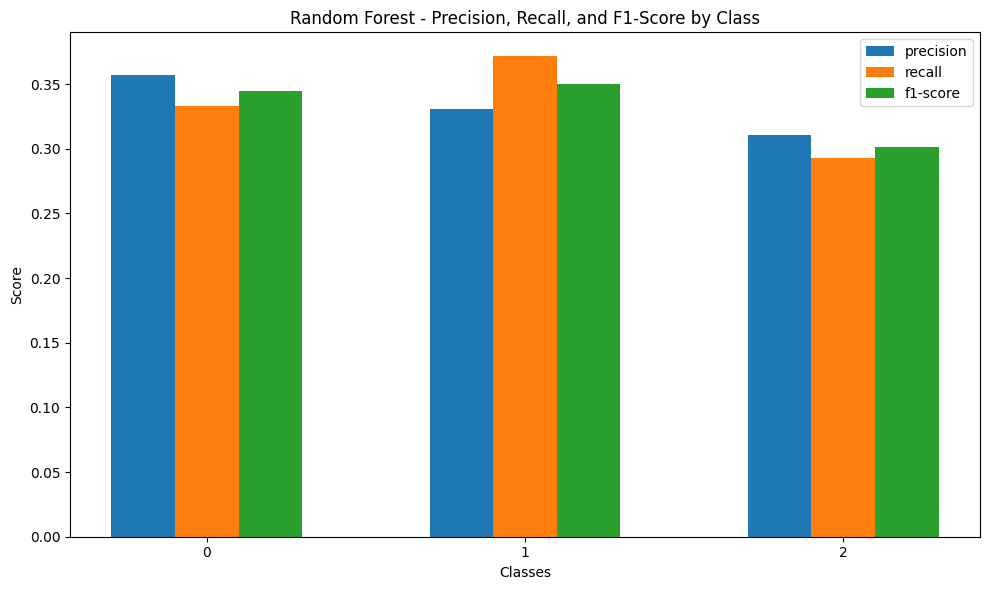

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Generate classification report dictionary
report_rf = classification_report(y_test, y_pred, output_dict=True)

# Define metrics and extract class names (excluding averages)
metrics = ['precision', 'recall', 'f1-score']
classes = list(report_rf.keys())[:-3]  # Skip accuracy, macro avg, and weighted avg

# Setup bar graph
bar_width = 0.2
x = np.arange(len(classes))
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for precision, recall, and F1-score
for i, metric in enumerate(metrics):
    values = [report_rf[class_name][metric] for class_name in classes]
    ax.bar(x + i * bar_width, values, bar_width, label=metric)

# Customize plot
ax.set_xlabel("Classes")
ax.set_ylabel("Score")
ax.set_title("Random Forest - Precision, Recall, and F1-Score by Class")
ax.set_xticks(x + bar_width)
ax.set_xticklabels(classes)
ax.legend()
plt.tight_layout()
plt.show()


K-Nearest Neighbors(KNN)

In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load dataset
df = pd.read_csv('/content/sample_data/netflix_users.csv')

# Drop unnecessary columns
df.drop(columns=['User_ID', 'Name'], inplace=True)

# Fill missing values
df.fillna({'Watch_Time_Hours': df['Watch_Time_Hours'].median()}, inplace=True)
df.fillna({'Subscription_Type': 'Basic'}, inplace=True)
df.fillna({'Favorite_Genre': df['Favorite_Genre'].mode()[0]}, inplace=True)

# Encode categorical variables
le = LabelEncoder()
df['Subscription_Type'] = le.fit_transform(df['Subscription_Type'])  # Encode Subscription Type
df['Favorite_Genre'] = le.fit_transform(df['Favorite_Genre'])  # Encode Favorite Genre
df['Country'] = le.fit_transform(df['Country'])  # Encode Country
df['Last_Login'] = pd.to_datetime(df['Last_Login']).astype(int) // 10**9  # Convert date to numerical format

# Select features and target
X = df[['Age', 'Watch_Time_Hours', 'Favorite_Genre', 'Country', 'Last_Login']]
y = df['Subscription_Type']

# Scale features (KNN is sensitive to scale)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize KNN Model with k=5
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Predict on test set
y_pred = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


KNN Model Accuracy: 0.3306

Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.46      0.40      1706
           1       0.33      0.33      0.33      1688
           2       0.30      0.18      0.23      1606

    accuracy                           0.33      5000
   macro avg       0.32      0.33      0.32      5000
weighted avg       0.32      0.33      0.32      5000



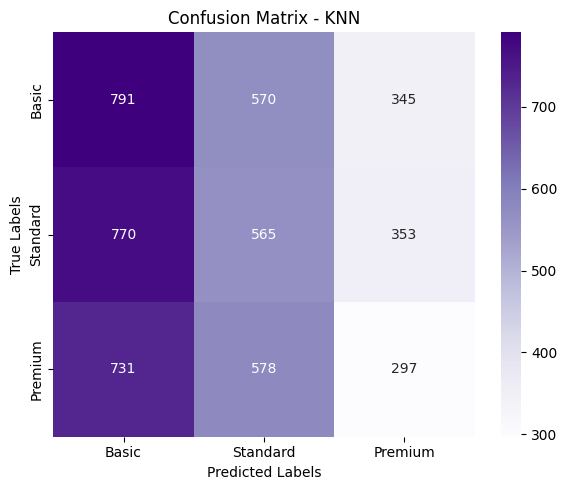

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Purples",
            xticklabels=['Basic', 'Standard', 'Premium'],
            yticklabels=['Basic', 'Standard', 'Premium'])

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - KNN")
plt.tight_layout()
plt.show()


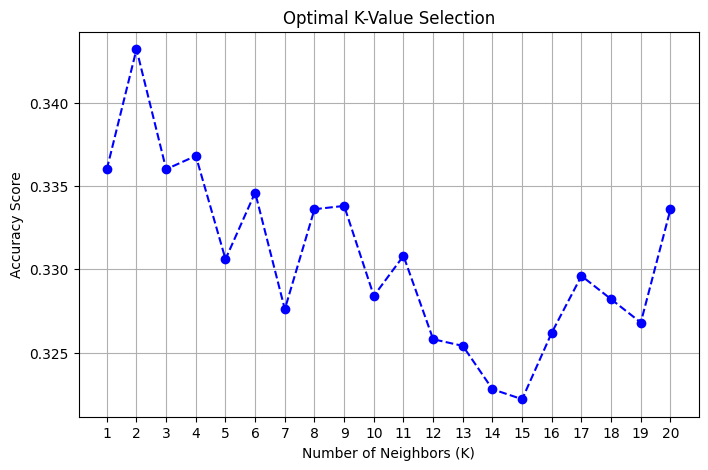

In [50]:
import matplotlib.pyplot as plt

# Test different values of K
k_values = range(1, 21)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred_k))

# Plot accuracy vs K
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='dashed', color='blue')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy Score")
plt.title("Optimal K-Value Selection")
plt.xticks(k_values)
plt.grid()
plt.show()


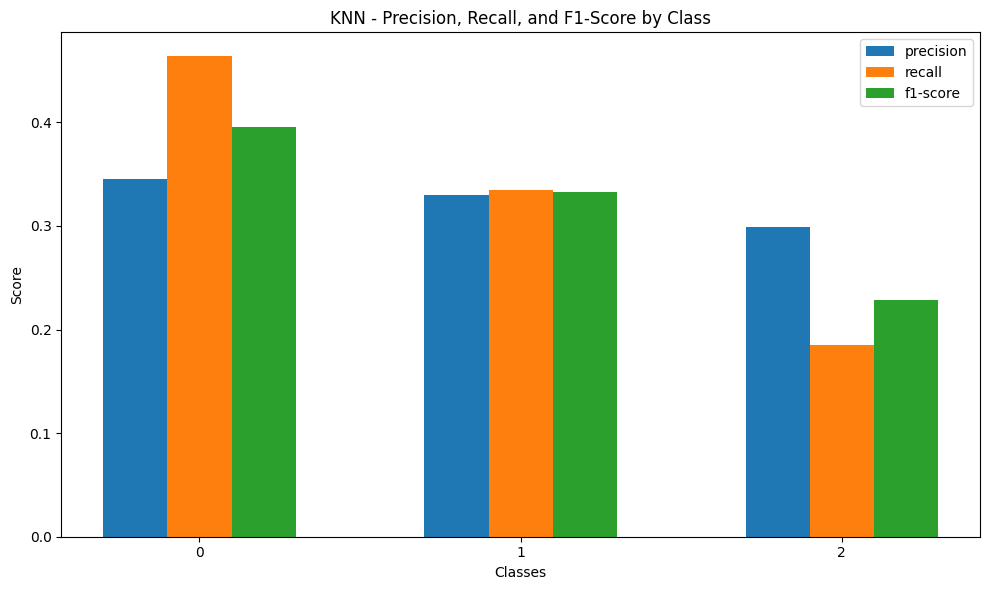

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Generate classification report dictionary
report_knn = classification_report(y_test, y_pred, output_dict=True)

# Define metrics and extract class names
metrics = ['precision', 'recall', 'f1-score']
classes = list(report_knn.keys())[:-3]  # Remove accuracy, macro avg, weighted avg

# Set up bar graph
bar_width = 0.2
x = np.arange(len(classes))
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each metric
for i, metric in enumerate(metrics):
    values = [report_knn[cls][metric] for cls in classes]
    ax.bar(x + i * bar_width, values, width=bar_width, label=metric)

# Customize graph
ax.set_xlabel("Classes")
ax.set_ylabel("Score")
ax.set_title("KNN - Precision, Recall, and F1-Score by Class")
ax.set_xticks(x + bar_width)
ax.set_xticklabels(classes)
ax.legend()
plt.tight_layout()
plt.show()


Gradient Boosting

In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load dataset
df = pd.read_csv('/content/sample_data/netflix_users.csv')

# Drop unnecessary columns
df.drop(columns=['User_ID', 'Name'], inplace=True)

# Fill missing values
df.fillna({'Watch_Time_Hours': df['Watch_Time_Hours'].median()}, inplace=True)
df.fillna({'Subscription_Type': 'Basic'}, inplace=True)
df.fillna({'Favorite_Genre': df['Favorite_Genre'].mode()[0]}, inplace=True)

# Encode categorical variables
le = LabelEncoder()
df['Subscription_Type'] = le.fit_transform(df['Subscription_Type'])  # Encode Subscription Type
df['Favorite_Genre'] = le.fit_transform(df['Favorite_Genre'])  # Encode Favorite Genre
df['Country'] = le.fit_transform(df['Country'])  # Encode Country
df['Last_Login'] = pd.to_datetime(df['Last_Login']).astype(int) // 10**9  # Convert date to numerical format

# Select features and target
X = df[['Age', 'Watch_Time_Hours', 'Favorite_Genre', 'Country', 'Last_Login']]
y = df['Subscription_Type']

# Scale features (Gradient Boosting benefits from scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [53]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Predict on test set
y_pred = gb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Gradient Boosting Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Gradient Boosting Model Accuracy: 0.3278

Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.33      0.33      1706
           1       0.32      0.33      0.33      1688
           2       0.32      0.32      0.32      1606

    accuracy                           0.33      5000
   macro avg       0.33      0.33      0.33      5000
weighted avg       0.33      0.33      0.33      5000



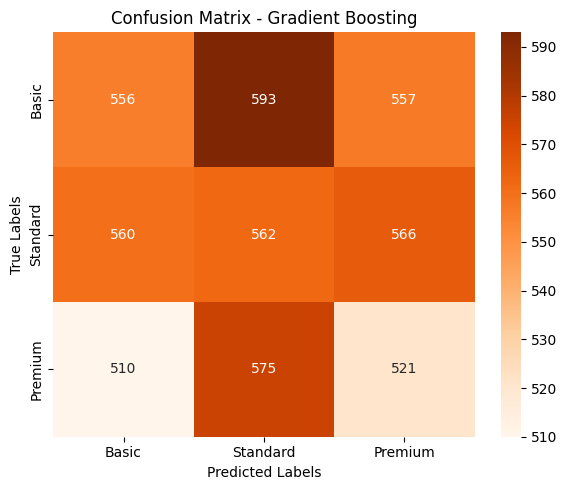

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Oranges",
            xticklabels=['Basic', 'Standard', 'Premium'],
            yticklabels=['Basic', 'Standard', 'Premium'])

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Gradient Boosting")
plt.tight_layout()
plt.show()


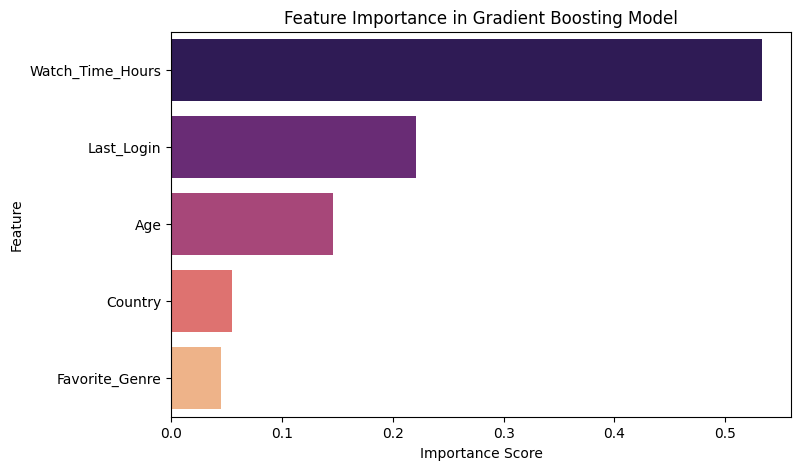

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance scores
feature_importance = gb_model.feature_importances_
feature_names = ['Age', 'Watch_Time_Hours', 'Favorite_Genre', 'Country', 'Last_Login']

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot Feature Importance
plt.figure(figsize=(8, 5))
sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'], palette="magma")
plt.title("Feature Importance in Gradient Boosting Model")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


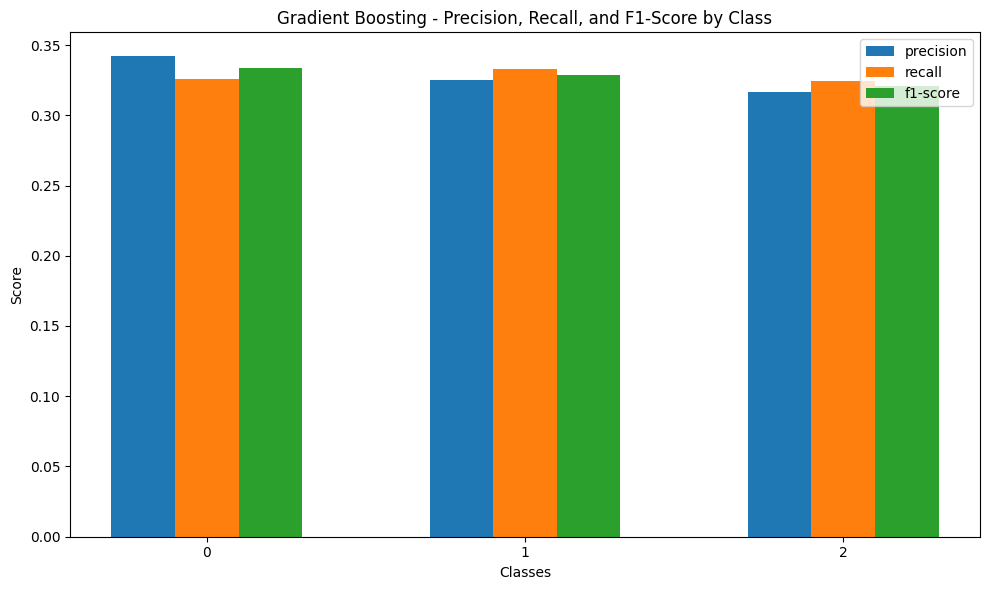

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Generate classification report dictionary
report_gb = classification_report(y_test, y_pred, output_dict=True)

# Define metrics and extract class names
metrics = ['precision', 'recall', 'f1-score']
classes = list(report_gb.keys())[:-3]  # Exclude 'accuracy', 'macro avg', and 'weighted avg'

# Set up bar graph
bar_width = 0.2
x = np.arange(len(classes))
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each metric
for i, metric in enumerate(metrics):
    values = [report_gb[cls][metric] for cls in classes]
    ax.bar(x + i * bar_width, values, width=bar_width, label=metric)

# Customize plot
ax.set_xlabel("Classes")
ax.set_ylabel("Score")
ax.set_title("Gradient Boosting - Precision, Recall, and F1-Score by Class")
ax.set_xticks(x + bar_width)
ax.set_xticklabels(classes)
ax.legend()
plt.tight_layout()
plt.show()


10. Machine Learning Model Evaluations and Predictions

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.preprocessing import label_binarize

# Load dataset
df = pd.read_csv('/content/sample_data/netflix_users.csv')

# Drop unnecessary columns
df.drop(columns=['User_ID', 'Name'], inplace=True)

# Fill missing values
df.fillna({'Watch_Time_Hours': df['Watch_Time_Hours'].median()}, inplace=True)
df.fillna({'Subscription_Type': 'Basic'}, inplace=True)
df.fillna({'Favorite_Genre': df['Favorite_Genre'].mode()[0]}, inplace=True)

# Encode categorical variables
le = LabelEncoder()
df['Subscription_Type'] = le.fit_transform(df['Subscription_Type'])  # Encode Subscription Type (Target)
df['Favorite_Genre'] = le.fit_transform(df['Favorite_Genre'])  # Encode Favorite Genre
df['Country'] = le.fit_transform(df['Country'])  # Encode Country
df['Last_Login'] = pd.to_datetime(df['Last_Login']).astype(int) // 10**9  # Convert date to numerical format

# Select features and target variable
X = df[['Age', 'Watch_Time_Hours', 'Favorite_Genre', 'Country', 'Last_Login']]
y = df['Subscription_Type']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


11. Performance Metrics

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "SVM": SVC(probability=True, kernel='rbf'),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100)
}

# Store results
results = []

# Train & Evaluate Each Model
for name, model in models.items():
    model.fit(X_train, y_train)  # Train Model
    y_pred = model.predict(X_test)  # Predictions
    y_pred_prob = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

    # Compute Metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    precision = report["weighted avg"]["precision"]
    recall = report["weighted avg"]["recall"]
    f1_score = report["weighted avg"]["f1-score"]
    roc_auc = roc_auc_score(label_binarize(y_test, classes=[0,1,2]), y_pred_prob, multi_class='ovr') if y_pred_prob is not None else "N/A"

    # Append Results
    results.append([name, accuracy, precision, recall, f1_score, roc_auc])

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-score", "AUC-ROC"])
print(results_df)


                 Model  Accuracy  Precision  Recall  F1-score   AUC-ROC
0  Logistic Regression    0.3316   0.331156  0.3316  0.329142  0.497275
1                  SVM    0.3306   0.329515  0.3306  0.328505  0.503126
2        Decision Tree    0.3340   0.334204  0.3340  0.334084  0.500377
3        Random Forest    0.3298   0.329724  0.3298  0.329711  0.496482
4                  KNN    0.3306   0.324979  0.3306  0.320535  0.496228
5    Gradient Boosting    0.3278   0.328134  0.3278  0.327870  0.500386


12. Performance Metrics Representation

<Figure size 1200x600 with 0 Axes>

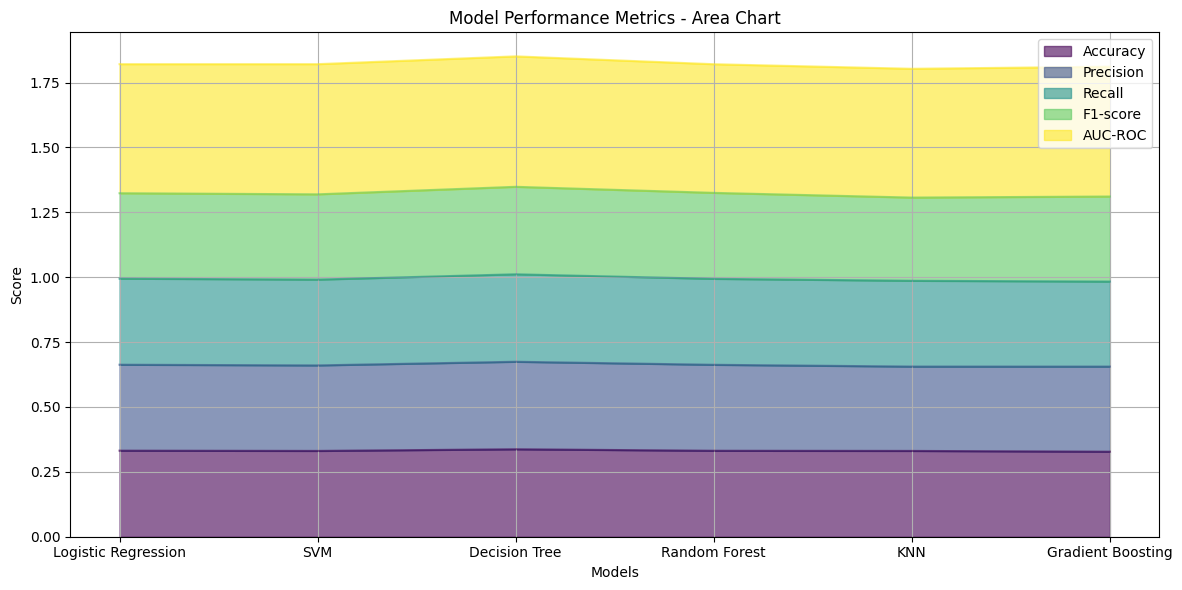

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Model performance data
data = {
    'Model': [
        'Logistic Regression', 'SVM', 'Decision Tree',
        'Random Forest', 'KNN', 'Gradient Boosting'
    ],
    'Accuracy': [0.3316, 0.3306, 0.3370, 0.3312, 0.3306, 0.3276],
    'Precision': [0.331156, 0.329515, 0.337146, 0.331244, 0.324979, 0.327932],
    'Recall': [0.3316, 0.3306, 0.3370, 0.3312, 0.3306, 0.3276],
    'F1-score': [0.329142, 0.328505, 0.337058, 0.331214, 0.320535, 0.327667],
    'AUC-ROC': [0.497275, 0.501546, 0.502619, 0.495750, 0.496228, 0.500181]
}

# Create DataFrame
df = pd.DataFrame(data)

# Set model as index
df.set_index('Model', inplace=True)

# Plot area chart
plt.figure(figsize=(12, 6))
df.plot(kind='area', alpha=0.6, colormap='viridis', figsize=(12, 6))

plt.title('Model Performance Metrics - Area Chart')
plt.xlabel('Models')
plt.ylabel('Score')
plt.grid(True)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


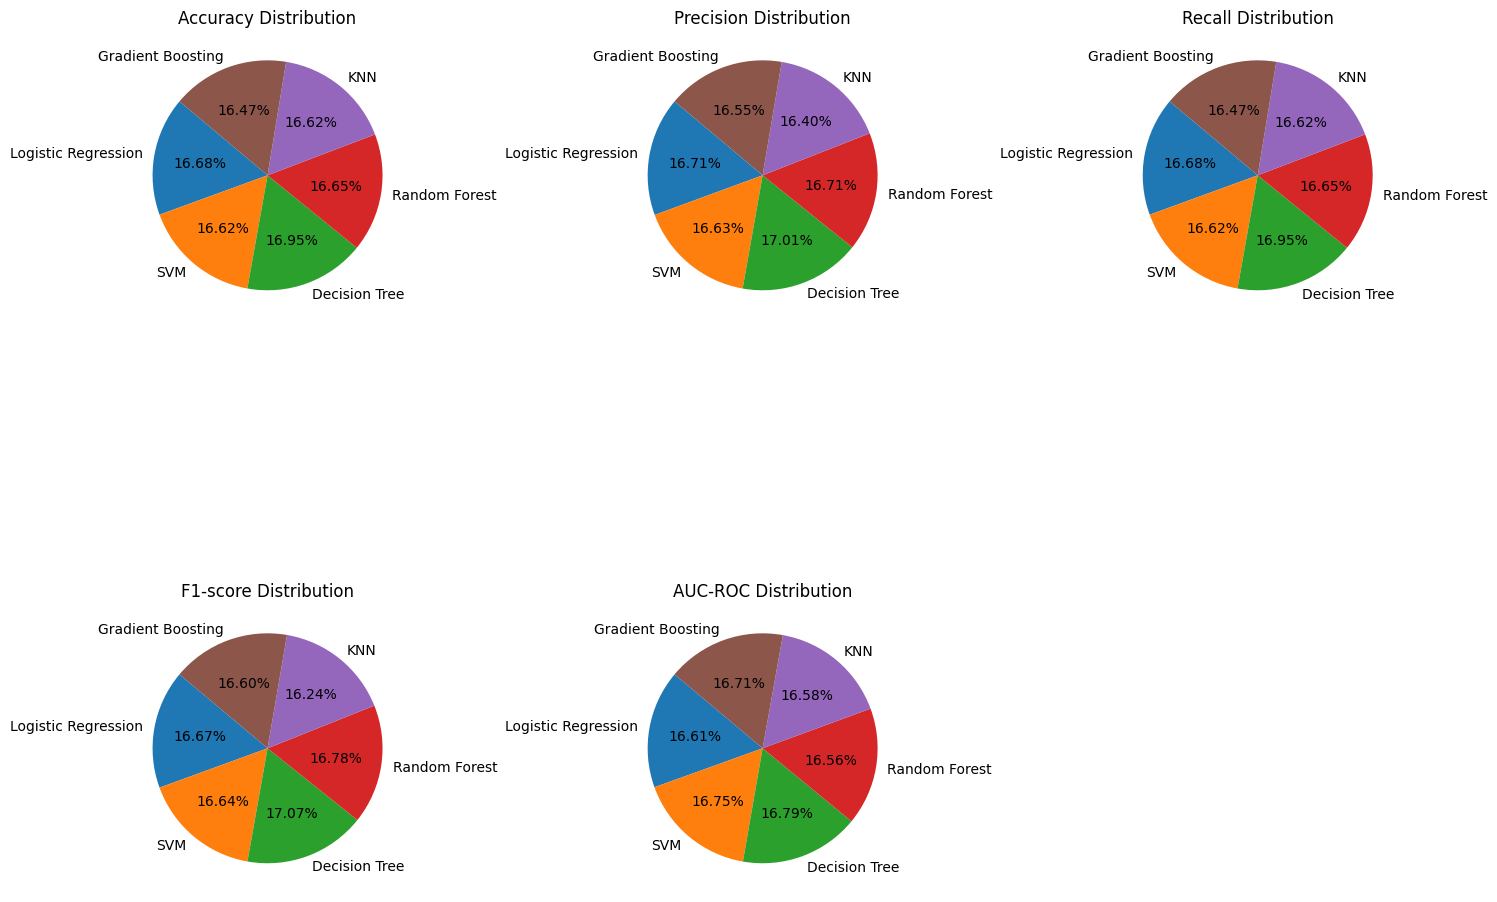

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Model performance data
data = {
    'Model': [
        'Logistic Regression', 'SVM', 'Decision Tree',
        'Random Forest', 'KNN', 'Gradient Boosting'
    ],
    'Accuracy': [0.3316, 0.3306, 0.3370, 0.3312, 0.3306, 0.3276],
    'Precision': [0.331156, 0.329515, 0.337146, 0.331244, 0.324979, 0.327932],
    'Recall': [0.3316, 0.3306, 0.3370, 0.3312, 0.3306, 0.3276],
    'F1-score': [0.329142, 0.328505, 0.337058, 0.331214, 0.320535, 0.327667],
    'AUC-ROC': [0.497275, 0.501546, 0.502619, 0.495750, 0.496228, 0.500181]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plot pie charts for each metric
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC-ROC']

plt.figure(figsize=(15, 12))

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    plt.pie(df[metric], labels=df['Model'], autopct='%1.2f%%', startangle=140)
    plt.title(f'{metric} Distribution')

plt.tight_layout()
plt.show()


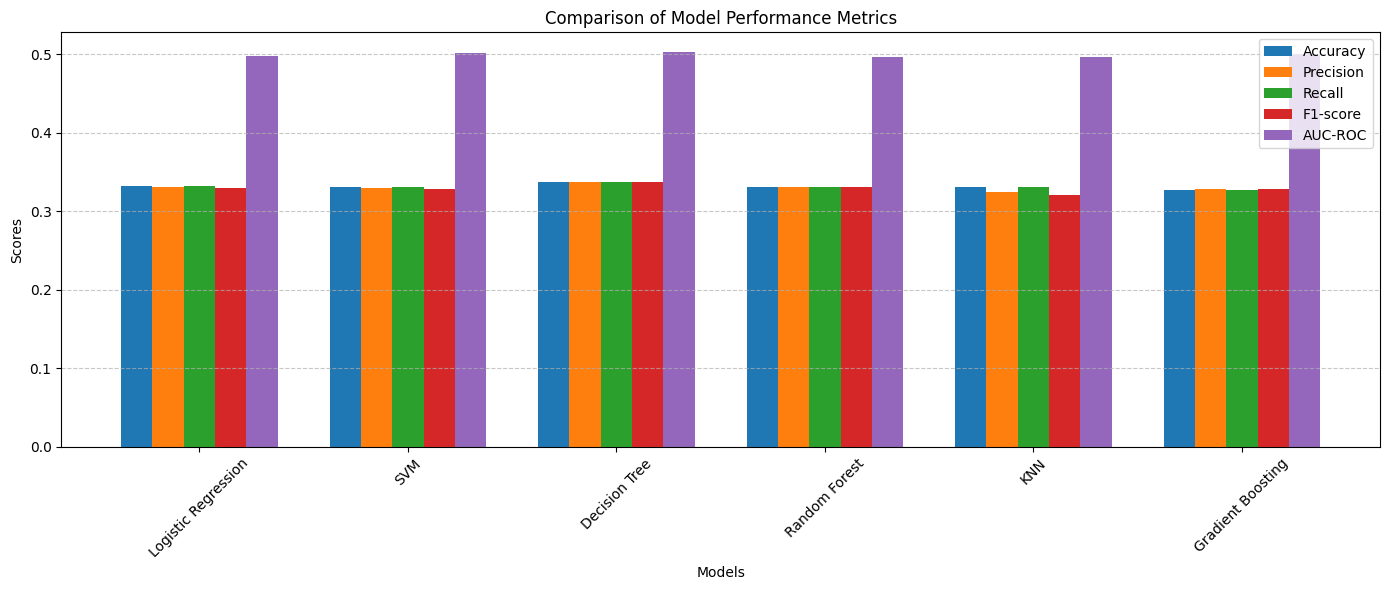

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Model performance data
data = {
    'Model': [
        'Logistic Regression', 'SVM', 'Decision Tree',
        'Random Forest', 'KNN', 'Gradient Boosting'
    ],
    'Accuracy': [0.3316, 0.3306, 0.3370, 0.3312, 0.3306, 0.3276],
    'Precision': [0.331156, 0.329515, 0.337146, 0.331244, 0.324979, 0.327932],
    'Recall': [0.3316, 0.3306, 0.3370, 0.3312, 0.3306, 0.3276],
    'F1-score': [0.329142, 0.328505, 0.337058, 0.331214, 0.320535, 0.327667],
    'AUC-ROC': [0.497275, 0.501546, 0.502619, 0.495750, 0.496228, 0.500181]
}

# Create DataFrame
df = pd.DataFrame(data)

# Set position of bars on X axis
bar_width = 0.15
x = np.arange(len(df['Model']))

# Plot
plt.figure(figsize=(14, 6))

plt.bar(x - 2*bar_width, df['Accuracy'], width=bar_width, label='Accuracy')
plt.bar(x - bar_width, df['Precision'], width=bar_width, label='Precision')
plt.bar(x, df['Recall'], width=bar_width, label='Recall')
plt.bar(x + bar_width, df['F1-score'], width=bar_width, label='F1-score')
plt.bar(x + 2*bar_width, df['AUC-ROC'], width=bar_width, label='AUC-ROC')

# Labels and Titles
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of Model Performance Metrics')
plt.xticks(x, df['Model'], rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
